In [1]:
import os
import sys
import math
import random

import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.sandbox.stats.multicomp import multipletests
from scipy.spatial import distance
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cophenet
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '../../')
import ccal
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

==================== Computational Cancer Analysis Library ====================
<16:11:32.551128> Checking dependencies ...
<16:11:32.553234> Using the following packages:
<16:11:32.554875> 	matplotlib (v1.5.1)
<16:11:32.554892> 	numpy (v1.10.4)
<16:11:32.554902> 	pandas (v0.18.0)
<16:11:32.554922> 	rpy2 (v2.7.9)
<16:11:32.554931> 	scikit-learn (v0.17.1)
<16:11:32.554938> 	scipy (v0.17.0)
<16:11:32.554945> 	seaborn (v0.7.0)


1.0352649238413776 1.624504792712471


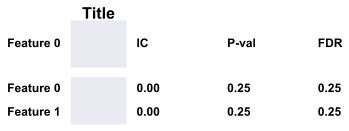

1.0352649238413776 1.624504792712471


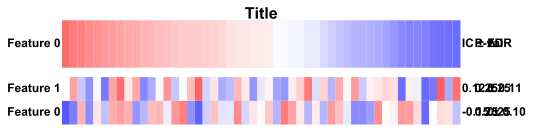

1.0352649238413776 1.624504792712471


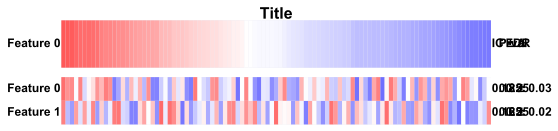

1.0352649238413776 1.624504792712471


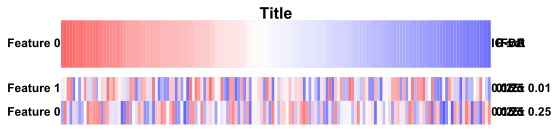

1.0352649238413776 1.624504792712471


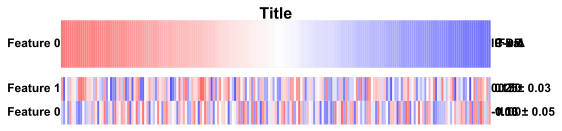

1.0352649238413776 1.624504792712471


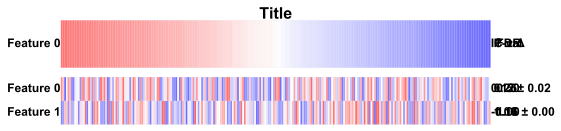

1.0352649238413776 1.624504792712471


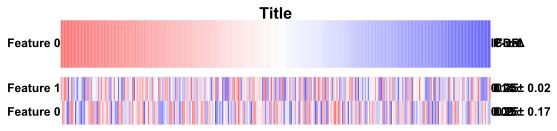

1.0352649238413776 1.624504792712471


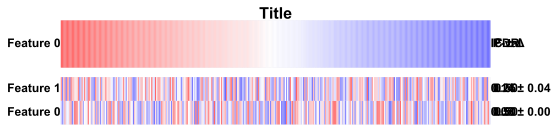

1.0352649238413776 1.624504792712471


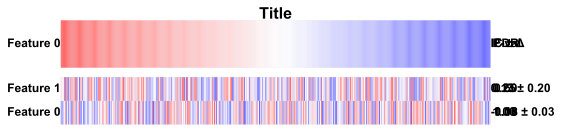

1.0352649238413776 1.624504792712471


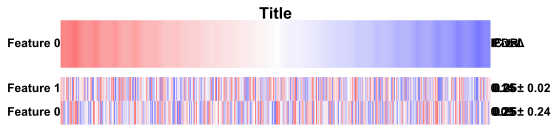

1.2184288317427105 15.892870350080608


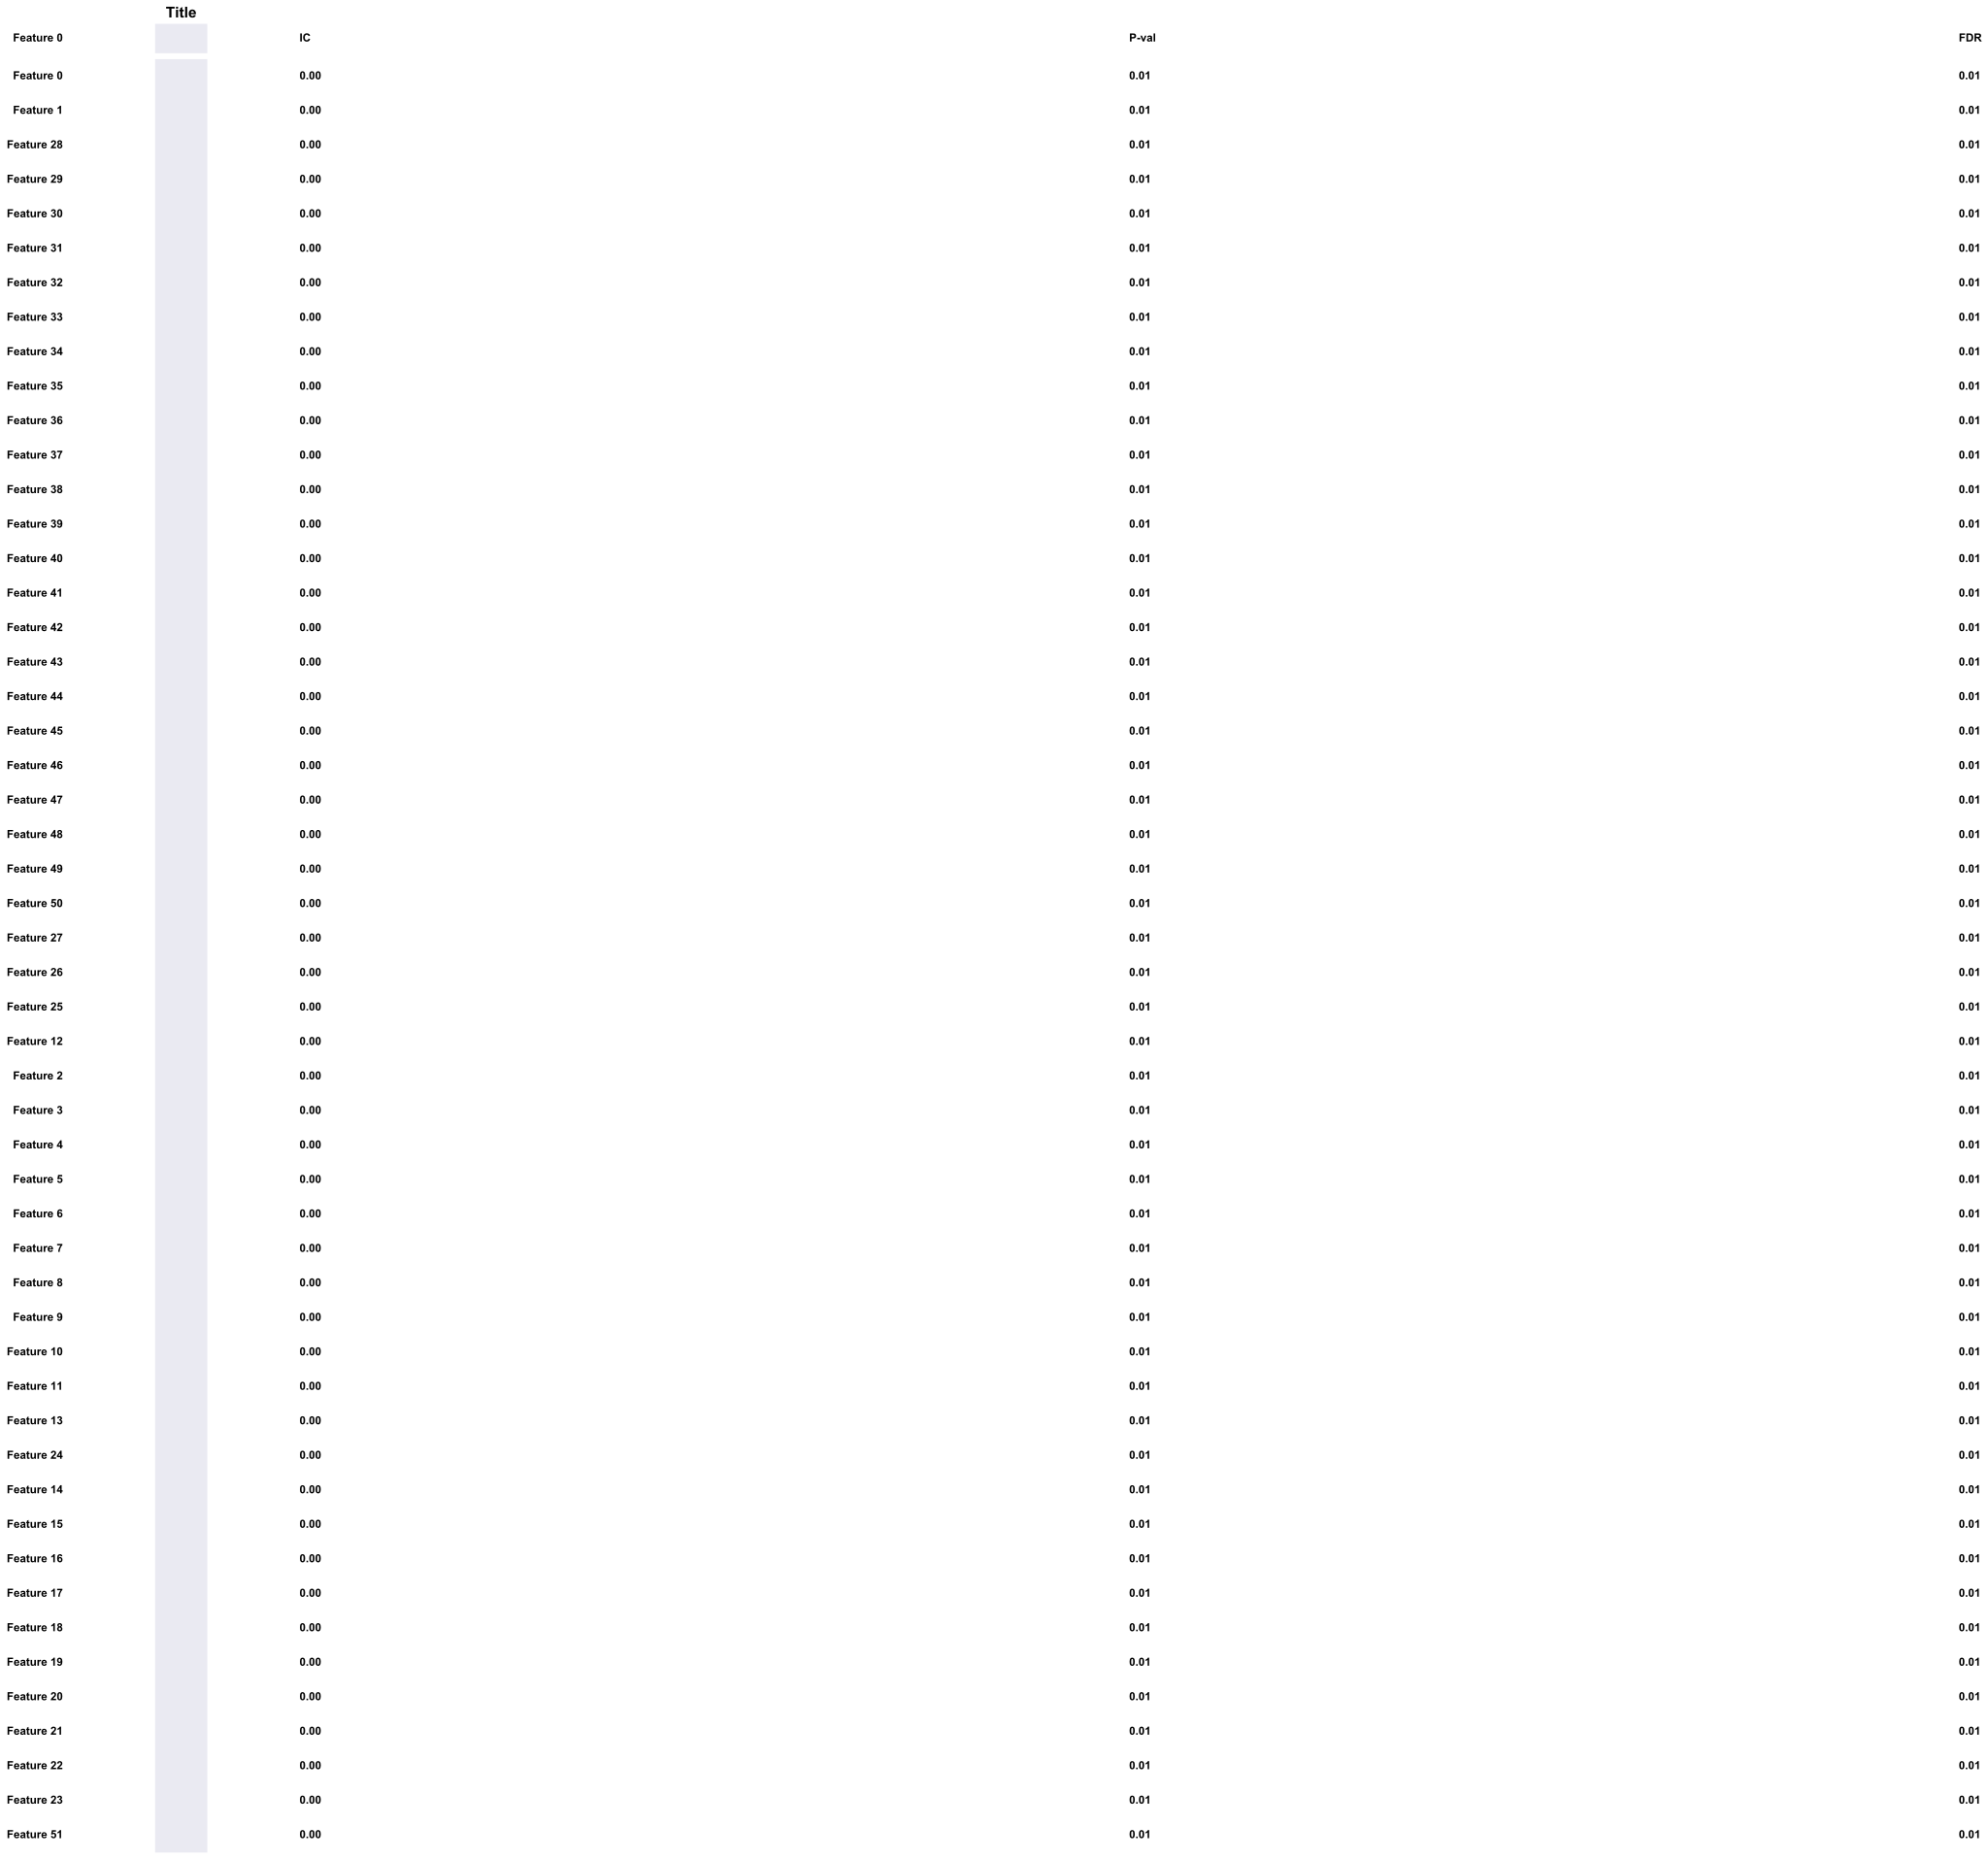

1.2184288317427105 15.892870350080608


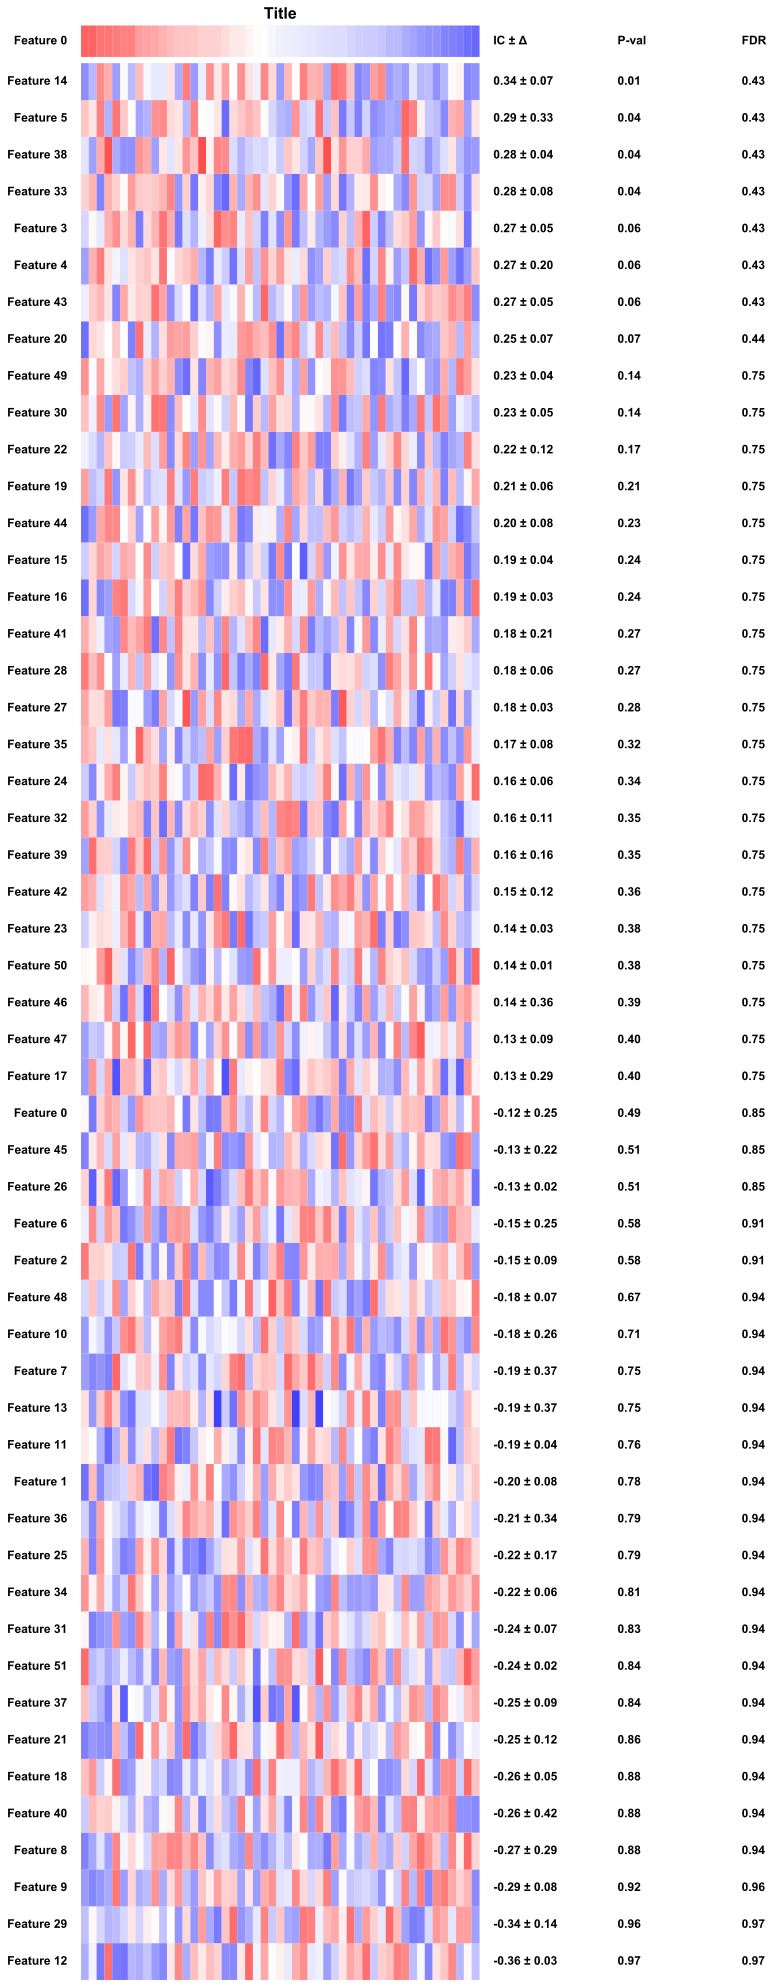

In [ ]:
ccal.support.VERBOSE = False
for r in range(2, 500, 50):
    for c in range(1, 500, 50):
        features_random = ccal.support.make_random_features(r, c)
        ref_random = ccal.support.make_random_features(1, c)
        ccal.analyze.rank_features_against_reference(features_random, ref_random, n_sampling=2, n_perm=2, n_features=0, title='Title')

<16:11:38.794886> Computing features vs. Feature 0 using information_coef metric ...
<16:11:38.795058> Using 20 intersecting columns from features and ref, which have 20 and 20 columns respectively ...
<16:11:38.797661> Computing scores using information_coef metric ...
<16:11:39.296892> Bootstrapping to get 0.95 confidence interval ...
<16:11:40.237392> Performing permutation test with 1 permutations ...
<16:11:40.778022> Plotting 20 features vs. reference > 0 quantile ...
<16:11:40.779152> Plotting 20 features vs. reference < 1 quantile ...
1.1615863496415424 8.141810630738087
<16:11:40.837811> Normalizing continuous features ...
<16:11:40.901656> Normalizing continuous ref ...


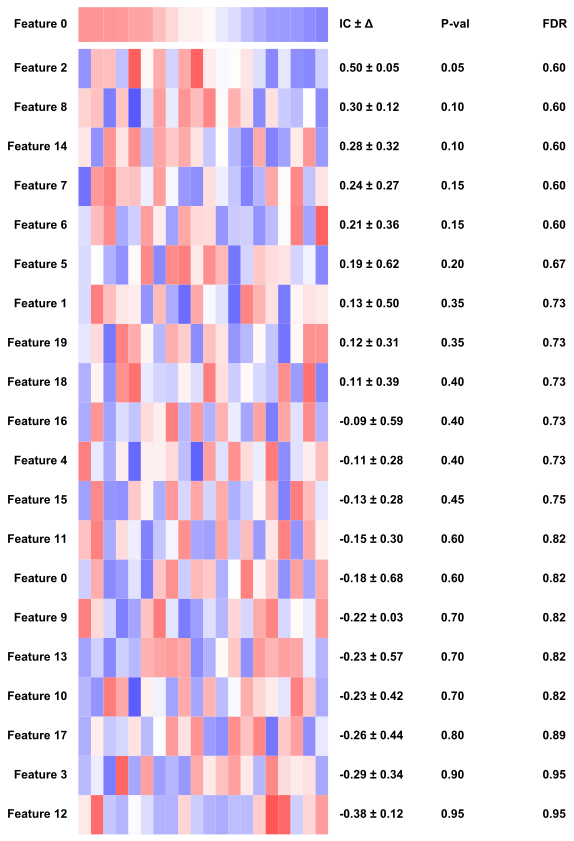

In [2]:
features = ccal.support.make_random_features(20, 20)
ref = ccal.support.make_random_features(1, 20)
ccal.analyze.rank_features_against_reference(features, ref, n_sampling=2, n_perm=1, n_features=0)

gridspec=plt.GridSpec(features.shape[0], features.shape[1])
plt.subplot(gridspec.new_subplotspec((0, 0), colspan=8))
plt.subplot(gridspec.new_subplotspec((1, 0), rowspan=features.shape[0] - 1, colspan=8))
plt.subplot(gridspec.new_subplotspec((0, 8), rowspan=features.shape[0], colspan=2))

features = ccal.support.read_gct('/Users/Kwat/Downloads/v22_pub.gct')
component_x_cellline = ccal.support.read_gct('/Users/Kwat/Downloads/CCLE.rpkm.v2.SELECTED_SIGNATURES.v2.gct')
ref = component_x_cellline.ix['KRAS_SALE_Late_Comp_C1_9', :]
ccal.analyze.rank_features_against_reference(features, ref, n_sampling=1, n_perm=1)

# Test IC
x = np.random.random_sample(10)
y = np.random.random_sample(10)
print(ccal.information.information_coefficient(x, y))

x = np.random.random_sample(10)
y = np.random.random_sample(11)
try:
    ccal.information.information_coefficient(x, y)
except ValueError as e:
    print(e)

x = np.random.random_sample(10)
x[1] = None
y = np.random.random_sample(10)
y[2] = None
print(ccal.information.information_coefficient(x, y))

x = np.random.random_sample(10)
x[1] = None
y = np.random.random_sample(10)
y[2] = None
y[6] = None
print(ccal.information.information_coefficient(x, y))

x = np.random.random_sample(10)
x[1] = None
x[3] = None
x[5] = None
y = np.random.random_sample(10)
y[2] = None
y[4] = None
print(ccal.information.information_coefficient(x, y))

x = np.array([12.517, 14.706, np.nan, 14.12, np.nan, np.nan, np.nan, 12.255])
y = np.array([0.98246356, 0.97525171, 0.77744759, 0.64084311, 0.4405853, 0.43827196, 0.12447757, 0.08116039])
print(ccal.information.information_coefficient(x, y))